In [4]:
import torch
import torchvision
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from torchvision import transforms


from torchvision import datasets
from torch.utils.data import Subset

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# cd /content/drive/MyDrive/SnakeDataset

In [11]:
root_dir = "C:/Users/noemi/Desktop/snake_dataset2"
train_path = root_dir + "/train"

In [12]:
transform = transforms.Compose(
        [transforms.Resize([64, 64])])


train_set = torchvision.datasets.ImageFolder(train_path, transform=transform)

classes = ('Black_Rat_snake', 'Common_Garter_snake', 'DeKays_Brown_snake', 'Northern_Watersnake', 'Western_Diamondback_rattlesnake')

In [13]:
# Dataset len
num_train = len(train_set)
print(f"Num. training samples: {num_train}")

Num. training samples: 17389


In [14]:
sample, label = train_set[0]
print(sample)

<PIL.Image.Image image mode=RGB size=64x64 at 0x20FAE6B7DC0>


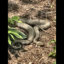

In [15]:
sample

In [16]:
classes[label]

'Black_Rat_snake'

In [17]:
# List of indexes on the training set
train_idx = list(range(num_train))

In [18]:
# Shuffle the training set
import random

random.shuffle(train_idx)
for i in range(10):
  print(train_idx[i])

15323
8060
8268
4012
16761
15748
7724
530
14996
9135


In [19]:
# Fraction of the original train set that we want to use as validation set
val_frac = 0.1
test_frac = 0.1
# Number of samples of the validation set
num_val = int(num_train * val_frac) 
num_test = int(num_train * test_frac) 
num_train = num_train - num_val - num_test

# Split training set
val_idx = train_idx[num_train: num_train + num_val]
test_idx = train_idx[num_train + num_val:]
train_idx = train_idx[:num_train]

print(f"{num_train} samples used as train set")
print(f"{num_val}  samples used as val set")
print(f"{num_test}  samples used as test set")

13913 samples used as train set
1738  samples used as val set
1738  samples used as test set


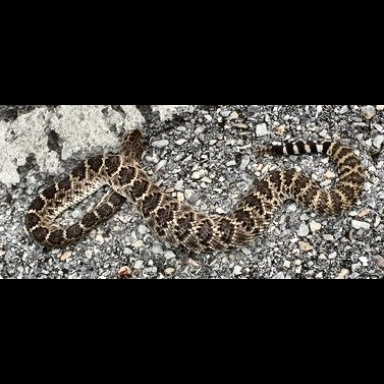

In [20]:
# Load dataset with transforms
train_set = torchvision.datasets.ImageFolder(train_path)
val_set = Subset(train_set, val_idx)
test_set = Subset(train_set, test_idx)
train_set = Subset(train_set, train_idx)

# Define loaders
from torch.utils.data import DataLoader
train_loader = DataLoader(train_set, batch_size=64, num_workers=0, shuffle=True)
val_loader   = DataLoader(val_set,   batch_size=64, num_workers=0, shuffle=False)
test_loader  = DataLoader(test_set,  batch_size=64, num_workers=0, shuffle=False)
sample, label = train_set[0]
sample


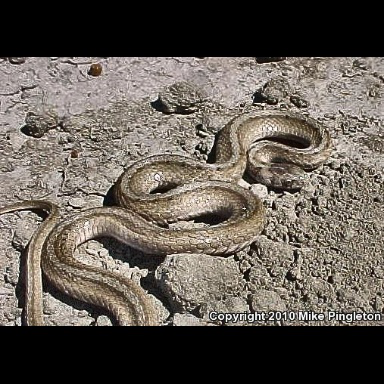

In [21]:
sampleval, labelval = val_set[0]
sampleval

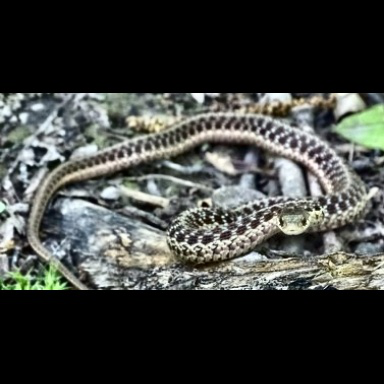

In [22]:
sampletest, labeltest = test_set[0]
sampletest

In [23]:
from torchvision import transforms

# Compose transformations
data_transform = transforms.Compose([
  transforms.Resize([28,28]),
  transforms.RandomRotation(degrees=(0, 20)), # data augmentation
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])

# Load dataset with transforms
train_set = torchvision.datasets.ImageFolder(train_path, transform=data_transform)

In [24]:
# Split train_dataset into training and validation and into training and test
from torch.utils.data import Subset

val_set = Subset(train_set, val_idx)
test_set = Subset(train_set, test_idx)
train_set = Subset(train_set, train_idx)


In [25]:
# Define loaders
from torch.utils.data import DataLoader
train_loader = DataLoader(train_set, batch_size=64, num_workers=0, shuffle=True)
val_loader   = DataLoader(val_set,   batch_size=64, num_workers=0, shuffle=False)
test_loader  = DataLoader(test_set,  batch_size=64, num_workers=0, shuffle=False)

In [26]:
import torch.nn as nn

class SimpleCNN(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 5 corretto last layer and kernelsize 3 no
        nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=1, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        
    )

  # Forward
  def forward(self, x):
    #input is B x 1 x 28 x 28
    x = self.conv_layer(x)
    return x

In [27]:
# Create the model
mymodel = SimpleCNN()
print(mymodel)

SimpleCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(512, 1024, kernel_size=(1, 1), stride=(1, 1))
    (12): ReLU()
    (13): AdaptiveMaxPool2d(output_size=2)
  )
)


In [30]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [31]:
# Get the size of a sample
test_x.size()

torch.Size([3, 28, 28])

In [32]:
test_x = test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 28, 28])

In [33]:
output = mymodel(test_x)
output.shape

torch.Size([1, 1024, 2, 2])

In [34]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

4096


In [35]:
output.size()

torch.Size([1, 1024, 2, 2])

In [36]:
class CNN(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 5 corretto dim last layer e kernelsize 3
        nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=1, padding=0, stride=1), 
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        
    )
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        nn.Flatten(),
        # a first FC layer
        nn.Linear(4096, 1024),
        nn.ReLU(),
        # the final Classification Layer
        nn.Linear(1024, 5)
     )
  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [37]:
# Create the model
mymodel_0 = CNN()
print(mymodel_0)
output = mymodel_0(test_x)
output.shape

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(512, 1024, kernel_size=(1, 1), stride=(1, 1))
    (12): ReLU()
    (13): AdaptiveMaxPool2d(output_size=2)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=5, bias=True)
  )
)


torch.Size([1, 5])

In [38]:
torch.cuda.is_available()

True

In [39]:
dev = torch.device('cuda')
print(dev)

cuda


In [40]:
#Define an optimizier
import torch.optim as optim
optimizer = optim.SGD(mymodel_0.parameters(), lr = 0.01)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [41]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device("cuda"), save_param = False, model_name="my_model"):
    try:
        net = net.to(dev)
       
        
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Store the best val accuracy
        best_val_accuracy = 0

        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}

            # Store params at the best validation accuracy
            if save_param and epoch_accuracy["val"] > best_val_accuracy:
              #torch.save(net.state_dict(), f"{net.__class__.__name__}_best_val.pth")
              torch.save(net.state_dict(), f"{model_name}_best_val.pth")
              best_val_accuracy = epoch_accuracy["val"]

            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        print('list of accuracy',history_accuracy)
        print('list of predictions',pred)
        #plt.plot('neurnet',net)
        #print('Neural network',net)

In [48]:
# Define dictionary of loaders
loaders = {"train": train_loader,   
           "val": val_loader,
           "test": test_loader}

train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.6091, TrA=0.2026, VL=1.6078, VA=0.2138, TeL=1.6080, TeA=0.1988,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.6077, TrA=0.2166, VL=1.6068, VA=0.2138, TeL=1.6073, TeA=0.1988,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=1.6071, TrA=0.2162, VL=1.6062, VA=0.2138, TeL=1.6070, TeA=0.1988,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=1.6067, TrA=0.2177, VL=1.6057, VA=0.2295, TeL=1.6067, TeA=0.2152,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=1.6064, TrA=0.2276, VL=1.6052, VA=0.2487, TeL=1.6063, TeA=0.2258,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=1.6058, TrA=0.2481, VL=1.6047, VA=0.2481, TeL=1.6057, TeA=0.2247,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=1.6052, TrA=0.2538, VL=1.6038, VA=0.2481, TeL=1.6050, TeA=0.2275,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=1.6042, TrA=0.2473, VL=1.6025, VA=0.2663, TeL=1.6037, TeA=0.2395,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=1.6027, TrA=0.2582, VL=1.6006, VA=0.2629, TeL=1.6016, TeA=0.2386,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=1.6004, TrA=0.2553, VL=1.5968, VA=0.3011, TeL=1.5987, TeA=0.2562,


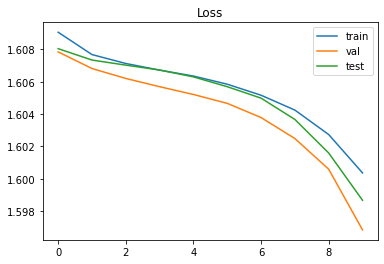

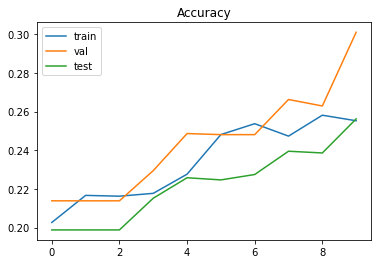

list of accuracy {'train': [0.20261754587155964, 0.21664850917431192, 0.2162356651376147, 0.2177092889908257, 0.22762327981651378, 0.24813073394495413, 0.25377006880733943, 0.2473337155963303, 0.2581651376146789, 0.2552895642201835], 'val': [0.2138392857142857, 0.2138392857142857, 0.2138392857142857, 0.2294642857142857, 0.2486607142857143, 0.2481026785714286, 0.2481026785714286, 0.2662946428571428, 0.2629464285714286, 0.30111607142857144], 'test': [0.19877232142857143, 0.19877232142857143, 0.19877232142857143, 0.21517857142857144, 0.22578125000000002, 0.2246651785714286, 0.22745535714285717, 0.23950892857142855, 0.23861607142857144, 0.25625]}
list of predictions tensor([[-0.1163,  0.0712,  0.0521, -0.0495, -0.0164],
        [-0.1173,  0.0622,  0.0327, -0.0449,  0.0096],
        [-0.1314,  0.0464,  0.0303, -0.0314,  0.0299],
        [-0.1310,  0.0295, -0.0223, -0.0087,  0.0853],
        [-0.1201,  0.0641,  0.0464, -0.0472, -0.0023],
        [-0.1382,  0.0100, -0.0491,  0.0062,  0.1291],

In [49]:
# Train model
train(mymodel_0, loaders, optimizer, criterion, epochs=10, dev=dev)

In [50]:
print(mymodel_0)

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(512, 1024, kernel_size=(1, 1), stride=(1, 1))
    (12): ReLU()
    (13): AdaptiveMaxPool2d(output_size=2)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=5, bias=True)
  )
)


In [51]:
from torchsummary import summary

# summary(your_model, input_size=(channels, H, W))
summary(mymodel_0, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]           1,792
              ReLU-2           [-1, 64, 26, 26]               0
            Conv2d-3          [-1, 128, 24, 24]          73,856
              ReLU-4          [-1, 128, 24, 24]               0
         MaxPool2d-5          [-1, 128, 12, 12]               0
            Conv2d-6          [-1, 256, 10, 10]         295,168
              ReLU-7          [-1, 256, 10, 10]               0
         MaxPool2d-8            [-1, 256, 5, 5]               0
            Conv2d-9            [-1, 512, 3, 3]       1,180,160
             ReLU-10            [-1, 512, 3, 3]               0
        MaxPool2d-11            [-1, 512, 1, 1]               0
           Conv2d-12           [-1, 1024, 1, 1]         525,312
             ReLU-13           [-1, 1024, 1, 1]               0
AdaptiveMaxPool2d-14           [-1, 102

In [52]:
for name, param in mymodel_0.named_parameters():
    print(name, param.shape)

conv_layer.0.weight torch.Size([64, 3, 3, 3])
conv_layer.0.bias torch.Size([64])
conv_layer.2.weight torch.Size([128, 64, 3, 3])
conv_layer.2.bias torch.Size([128])
conv_layer.5.weight torch.Size([256, 128, 3, 3])
conv_layer.5.bias torch.Size([256])
conv_layer.8.weight torch.Size([512, 256, 3, 3])
conv_layer.8.bias torch.Size([512])
conv_layer.11.weight torch.Size([1024, 512, 1, 1])
conv_layer.11.bias torch.Size([1024])
fc_layers.1.weight torch.Size([1024, 4096])
fc_layers.1.bias torch.Size([1024])
fc_layers.3.weight torch.Size([5, 1024])
fc_layers.3.bias torch.Size([5])


In [53]:
# define a function for counting the parameters of a model
def count_parameters(mymodel_0):
    return sum(p.numel() for p in mymodel_0.parameters() )

In [54]:
count_parameters(mymodel_0)

6276741

In [55]:
import torch.nn as nn

class SimpleCNN_1(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        
    )

  # Forward
  def forward(self, x):
    #input is B x 1 x 28 x 28
    x = self.conv_layer(x)
    return x

In [56]:
# Create the model
mymodel = SimpleCNN_1()
print(mymodel)

SimpleCNN_1(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): AdaptiveMaxPool2d(output_size=2)
  )
)


In [57]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [58]:
# Get the size of a sample
test_x.size()

torch.Size([3, 28, 28])

In [59]:
test_x = test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 28, 28])

In [60]:
output = mymodel(test_x)
output.shape

torch.Size([1, 512, 2, 2])

In [61]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

2048


In [62]:
 class CNN_1(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        
    )
       
       
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        nn.Flatten(),
        # a first FC layer
        nn.Linear(2048, 1024), 
        nn.ReLU(),
        # the final Classification Layer
        nn.Linear(1024, 5)
     )
  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [63]:
# Create the model
mymodel_1 = CNN_1()
print(mymodel_1)
output = mymodel_1(test_x)
output.shape

CNN_1(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): AdaptiveMaxPool2d(output_size=2)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=5, bias=True)
  )
)


torch.Size([1, 5])

In [64]:
#Define an optimizier
import torch.optim as optim
optimizer = optim.SGD(mymodel_1.parameters(), lr = 0.01)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [65]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device("cuda"), save_param = False, model_name="my_model_1"):
    try:
        net = net.to(dev)
       
        
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Store the best val accuracy
        best_val_accuracy = 0

        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}

            # Store params at the best validation accuracy
            if save_param and epoch_accuracy["val"] > best_val_accuracy:
              #torch.save(net.state_dict(), f"{net.__class__.__name__}_best_val.pth")
              torch.save(net.state_dict(), f"{model_name}_best_val.pth")
              best_val_accuracy = epoch_accuracy["val"]

            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        print('list of accuracy',history_accuracy)
        print('list of predictions',pred)
        #plt.plot('neurnet',net)
        #print('Neural network',net)

In [66]:
# Define dictionary of loaders
loaders = {"train": train_loader,   
           "val": val_loader,
           "test": test_loader}

train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.6082, TrA=0.2119, VL=1.6068, VA=0.2138, TeL=1.6071, TeA=0.1988,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.6064, TrA=0.2123, VL=1.6053, VA=0.2138, TeL=1.6056, TeA=0.1988,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=1.6050, TrA=0.2128, VL=1.6037, VA=0.2183, TeL=1.6041, TeA=0.2027,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=1.6033, TrA=0.2330, VL=1.6014, VA=0.2643, TeL=1.6021, TeA=0.2431,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=1.6005, TrA=0.2651, VL=1.5975, VA=0.2955, TeL=1.5980, TeA=0.2662,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=1.5953, TrA=0.2767, VL=1.5896, VA=0.2881, TeL=1.5902, TeA=0.2809,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=1.5843, TrA=0.2802, VL=1.5735, VA=0.2739, TeL=1.5746, TeA=0.2790,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=1.5669, TrA=0.2826, VL=1.5562, VA=0.3036, TeL=1.5600, TeA=0.2827,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=1.5532, TrA=0.2891, VL=1.5437, VA=0.2967, TeL=1.5463, TeA=0.2971,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=1.5459, TrA=0.2951, VL=1.5363, VA=0.3164, TeL=1.5381, TeA=0.3061,


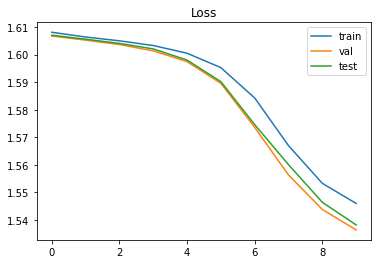

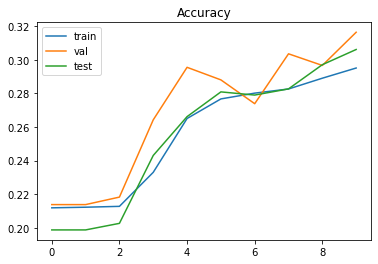

list of accuracy {'train': [0.21191800458715596, 0.2122849770642202, 0.21279529816513762, 0.23304759174311926, 0.26507740825688075, 0.2767287844036697, 0.2801691513761468, 0.2826376146788991, 0.2890567660550459, 0.2951175458715596], 'val': [0.2138392857142857, 0.2138392857142857, 0.21830357142857143, 0.2642857142857143, 0.2955357142857143, 0.28805803571428573, 0.27388392857142857, 0.30357142857142855, 0.29665178571428574, 0.31640625], 'test': [0.19877232142857143, 0.19877232142857143, 0.20267857142857143, 0.24308035714285717, 0.2661830357142857, 0.28091517857142856, 0.27901785714285715, 0.2827008928571429, 0.29709821428571426, 0.3061383928571429]}
list of predictions tensor([[-0.0551,  0.1673,  0.1125, -0.1333, -0.1205],
        [-0.0723,  0.0855, -0.0946, -0.0140,  0.0483],
        [-0.0782,  0.1454,  0.2025, -0.1856, -0.1120],
        [-0.1372, -0.0801, -0.5250,  0.3616,  0.3178],
        [-0.0508,  0.2335,  0.3369, -0.3281, -0.2156],
        [-0.1583, -0.1409, -0.5696,  0.3809,  0.4

In [67]:
# Train model
train(mymodel_1, loaders, optimizer, criterion, epochs=10, dev=dev)

In [68]:
print(mymodel_1)

CNN_1(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): AdaptiveMaxPool2d(output_size=2)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=5, bias=True)
  )
)


In [69]:
from torchsummary import summary

# summary(your_model, input_size=(channels, H, W))
summary(mymodel_1, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]           1,792
              ReLU-2           [-1, 64, 26, 26]               0
            Conv2d-3          [-1, 128, 24, 24]          73,856
              ReLU-4          [-1, 128, 24, 24]               0
         MaxPool2d-5          [-1, 128, 12, 12]               0
            Conv2d-6          [-1, 256, 10, 10]         295,168
              ReLU-7          [-1, 256, 10, 10]               0
         MaxPool2d-8            [-1, 256, 5, 5]               0
            Conv2d-9            [-1, 512, 3, 3]       1,180,160
             ReLU-10            [-1, 512, 3, 3]               0
AdaptiveMaxPool2d-11            [-1, 512, 2, 2]               0
          Flatten-12                 [-1, 2048]               0
           Linear-13                 [-1, 1024]       2,098,176
             ReLU-14                 [-

In [70]:
for name, param in mymodel_1.named_parameters():
    print(name, param.shape)

conv_layer.0.weight torch.Size([64, 3, 3, 3])
conv_layer.0.bias torch.Size([64])
conv_layer.2.weight torch.Size([128, 64, 3, 3])
conv_layer.2.bias torch.Size([128])
conv_layer.5.weight torch.Size([256, 128, 3, 3])
conv_layer.5.bias torch.Size([256])
conv_layer.8.weight torch.Size([512, 256, 3, 3])
conv_layer.8.bias torch.Size([512])
fc_layers.1.weight torch.Size([1024, 2048])
fc_layers.1.bias torch.Size([1024])
fc_layers.3.weight torch.Size([5, 1024])
fc_layers.3.bias torch.Size([5])


In [71]:
# define a function for counting the parameters of a model
def count_parameters(mymodel_1):
    return sum(p.numel() for p in mymodel_1.parameters() )

In [72]:
count_parameters(mymodel_1)

3654277

In [73]:
class SimpleCNN_2(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
          )

  # Forward
  def forward(self, x):
    #input is B x 1 x 28 x 28
    x = self.conv_layer(x)
    return x

In [74]:
# Create the model
mymodel = SimpleCNN_2()
print(mymodel)

SimpleCNN_2(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): AdaptiveMaxPool2d(output_size=2)
  )
)


In [75]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [76]:
# Get the size of a sample
test_x.size()

torch.Size([3, 28, 28])

In [77]:
test_x = test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 28, 28])

In [78]:
output = mymodel(test_x)
output.shape

torch.Size([1, 256, 2, 2])

In [79]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

1024


In [80]:
class CNN_2(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        
    )
    
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        nn.Flatten(),
        # a first FC layer
        nn.Linear(1024, 1024),
        nn.ReLU(),
        # the final Classification Layer
        nn.Linear(1024, 5)
     )
  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x)
    return output
       

In [81]:
# Create the model
mymodel_2 = CNN_2()
print(mymodel_2)
output = mymodel_2(test_x)
output.shape

CNN_2(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): AdaptiveMaxPool2d(output_size=2)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=5, bias=True)
  )
)


torch.Size([1, 5])

In [82]:
#Define an optimizier
import torch.optim as optim
optimizer = optim.SGD(mymodel_2.parameters(), lr = 0.01)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [83]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device("cuda"), save_param = False, model_name="my_model_2"):
    try:
        net = net.to(dev)
       
        
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Store the best val accuracy
        best_val_accuracy = 0

        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}

            # Store params at the best validation accuracy
            if save_param and epoch_accuracy["val"] > best_val_accuracy:
              #torch.save(net.state_dict(), f"{net.__class__.__name__}_best_val.pth")
              torch.save(net.state_dict(), f"{model_name}_best_val.pth")
              best_val_accuracy = epoch_accuracy["val"]

            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        print('list of accuracy',history_accuracy)
        print('list of predictions',pred)
        #plt.plot('neurnet',net)
        #print('Neural network',net)

In [84]:
# Define dictionary of loaders
loaders = {"train": train_loader,   
           "val": val_loader,
           "test": test_loader}

train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.6067, TrA=0.2360, VL=1.6036, VA=0.2819, TeL=1.6043, TeA=0.2641,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.6026, TrA=0.2595, VL=1.5995, VA=0.3015, TeL=1.6001, TeA=0.2689,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=1.5975, TrA=0.2797, VL=1.5928, VA=0.2998, TeL=1.5932, TeA=0.2821,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=1.5889, TrA=0.2853, VL=1.5808, VA=0.3020, TeL=1.5827, TeA=0.2738,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=1.5752, TrA=0.2801, VL=1.5647, VA=0.2981, TeL=1.5679, TeA=0.2771,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=1.5616, TrA=0.2881, VL=1.5519, VA=0.2967, TeL=1.5556, TeA=0.2807,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=1.5539, TrA=0.2910, VL=1.5445, VA=0.2925, TeL=1.5475, TeA=0.2916,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=1.5470, TrA=0.3004, VL=1.5374, VA=0.3089, TeL=1.5420, TeA=0.2955,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=1.5411, TrA=0.3026, VL=1.5311, VA=0.3087, TeL=1.5340, TeA=0.2987,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=1.5347, TrA=0.3052, VL=1.5263, VA=0.3143, TeL=1.5282, TeA=0.2931,


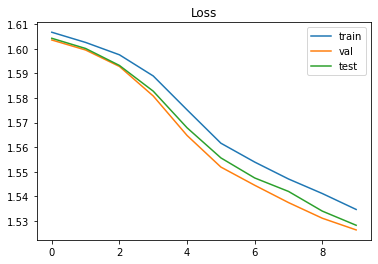

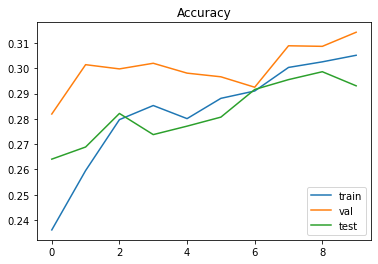

list of accuracy {'train': [0.23604931192660553, 0.2595441513761468, 0.2796989678899083, 0.28528096330275227, 0.28009747706422017, 0.288125, 0.2910321100917431, 0.3003583715596331, 0.30257167431192655, 0.3051691513761468], 'val': [0.2819196428571428, 0.3014508928571429, 0.29977678571428573, 0.3020089285714286, 0.2981026785714286, 0.29665178571428574, 0.29252232142857143, 0.30892857142857144, 0.3087053571428572, 0.31428571428571433], 'test': [0.2640625, 0.2688616071428572, 0.28214285714285714, 0.27377232142857144, 0.27712053571428574, 0.2806919642857143, 0.2916294642857143, 0.2955357142857143, 0.29866071428571433, 0.2930803571428572]}
list of predictions tensor([[-0.0144,  0.1840,  0.0368, -0.0918, -0.1310],
        [-0.0571,  0.1469, -0.0818, -0.0435,  0.0168],
        [-0.1544,  0.0818,  0.2183, -0.0575, -0.0895],
        [-0.1826, -0.0917, -0.4962,  0.3361,  0.4214],
        [-0.0564,  0.2193,  0.1103, -0.1947, -0.0684],
        [-0.2070, -0.2220, -0.6487,  0.4696,  0.6167],
        

In [85]:
# Train model
train(mymodel_2, loaders, optimizer, criterion, epochs=10, dev=dev)

In [86]:
print(mymodel_2)

CNN_2(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): AdaptiveMaxPool2d(output_size=2)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=5, bias=True)
  )
)


In [87]:
from torchsummary import summary

# summary(your_model, input_size=(channels, H, W))
summary(mymodel_2, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]           1,792
              ReLU-2           [-1, 64, 26, 26]               0
            Conv2d-3          [-1, 128, 24, 24]          73,856
              ReLU-4          [-1, 128, 24, 24]               0
         MaxPool2d-5          [-1, 128, 12, 12]               0
            Conv2d-6          [-1, 256, 10, 10]         295,168
              ReLU-7          [-1, 256, 10, 10]               0
 AdaptiveMaxPool2d-8            [-1, 256, 2, 2]               0
           Flatten-9                 [-1, 1024]               0
           Linear-10                 [-1, 1024]       1,049,600
             ReLU-11                 [-1, 1024]               0
           Linear-12                    [-1, 5]           5,125
Total params: 1,425,541
Trainable params: 1,425,541
Non-trainable params: 0
---------------------------

In [88]:
for name, param in mymodel_2.named_parameters():
    print(name, param.shape)

conv_layer.0.weight torch.Size([64, 3, 3, 3])
conv_layer.0.bias torch.Size([64])
conv_layer.2.weight torch.Size([128, 64, 3, 3])
conv_layer.2.bias torch.Size([128])
conv_layer.5.weight torch.Size([256, 128, 3, 3])
conv_layer.5.bias torch.Size([256])
fc_layers.1.weight torch.Size([1024, 1024])
fc_layers.1.bias torch.Size([1024])
fc_layers.3.weight torch.Size([5, 1024])
fc_layers.3.bias torch.Size([5])


In [89]:
# define a function for counting the parameters of a model
def count_parameters(mymodel_2):
    return sum(p.numel() for p in mymodel_0.parameters() )

In [90]:
count_parameters(mymodel_2)

6276741

In [91]:
class SimpleCNN_3(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
         )

  # Forward
  def forward(self, x):
    #input is B x 1 x 28 x 28
    x = self.conv_layer(x)
    return x

In [92]:
# Create the model
mymodel = SimpleCNN_3()
print(mymodel)

SimpleCNN_3(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): AdaptiveMaxPool2d(output_size=2)
  )
)


In [93]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [94]:
# Get the size of a sample
test_x.size()

torch.Size([3, 28, 28])

In [95]:
test_x = test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 28, 28])

In [96]:
output = mymodel(test_x)
output.shape

torch.Size([1, 128, 2, 2])

In [97]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

512


In [98]:
class CNN_3(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        
    )
    
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        nn.Flatten(),
        # a first FC layer
        nn.Linear(512, 1024), 
        nn.ReLU(),
        # the final Classification Layer
        nn.Linear(1024, 5)
     )
  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output
       

In [99]:
# Create the model
mymodel_3 = CNN_3()
print(mymodel_3)
output = mymodel_3(test_x)
output.shape

CNN_3(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): AdaptiveMaxPool2d(output_size=2)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=512, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=5, bias=True)
  )
)


torch.Size([1, 5])

In [100]:
#Define an optimizier
import torch.optim as optim
optimizer = optim.SGD(mymodel_3.parameters(), lr = 0.01)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [101]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device("cuda"), save_param = False, model_name="my_model_3"):
    try:
        net = net.to(dev)
       
        
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Store the best val accuracy
        best_val_accuracy = 0

        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}

            # Store params at the best validation accuracy
            if save_param and epoch_accuracy["val"] > best_val_accuracy:
              #torch.save(net.state_dict(), f"{net.__class__.__name__}_best_val.pth")
              torch.save(net.state_dict(), f"{model_name}_best_val.pth")
              best_val_accuracy = epoch_accuracy["val"]

            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        print('list of accuracy',history_accuracy)
        print('list of predictions',pred)
        #plt.plot('neurnet',net)
        #print('Neural network',net)

In [102]:
# Define dictionary of loaders
loaders = {"train": train_loader,   
           "val": val_loader,
           "test": test_loader}

train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.6010, TrA=0.2483, VL=1.5930, VA=0.3028, TeL=1.5930, TeA=0.2741,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.5862, TrA=0.2826, VL=1.5768, VA=0.3022, TeL=1.5784, TeA=0.2735,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=1.5699, TrA=0.2888, VL=1.5589, VA=0.3173, TeL=1.5622, TeA=0.2847,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=1.5554, TrA=0.2970, VL=1.5470, VA=0.3175, TeL=1.5489, TeA=0.2864,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=1.5460, TrA=0.3002, VL=1.5371, VA=0.3203, TeL=1.5419, TeA=0.2931,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=1.5372, TrA=0.3048, VL=1.5323, VA=0.3145, TeL=1.5308, TeA=0.3142,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=1.5300, TrA=0.3131, VL=1.5235, VA=0.3371, TeL=1.5211, TeA=0.3268,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=1.5207, TrA=0.3227, VL=1.5112, VA=0.3379, TeL=1.5150, TeA=0.3227,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=1.5102, TrA=0.3258, VL=1.5008, VA=0.3404, TeL=1.5020, TeA=0.3266,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=1.4988, TrA=0.3365, VL=1.4935, VA=0.3387, TeL=1.4906, TeA=0.3335,


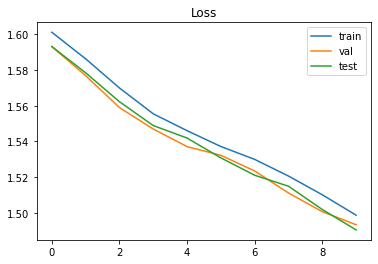

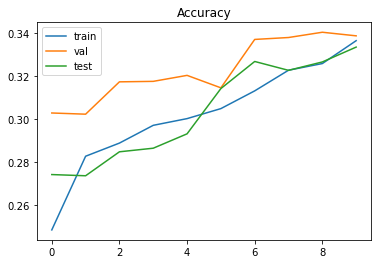

list of accuracy {'train': [0.2483228211009174, 0.2826462155963303, 0.28877006880733946, 0.29704415137614676, 0.3001662844036697, 0.30483371559633027, 0.3130905963302752, 0.3227121559633027, 0.3258113532110092, 0.336473623853211], 'val': [0.3027901785714286, 0.3022321428571429, 0.31729910714285714, 0.31752232142857145, 0.3203125, 0.3145089285714286, 0.33705357142857145, 0.3379464285714286, 0.3404017857142857, 0.33872767857142855], 'test': [0.2741071428571428, 0.27354910714285713, 0.28470982142857143, 0.2863839285714286, 0.2930803571428572, 0.31417410714285715, 0.3267857142857143, 0.32265625000000003, 0.32656250000000003, 0.3334821428571429]}
list of predictions tensor([[ 1.9464e-01,  3.6273e-01,  1.2914e-01, -2.0610e-01, -7.1610e-01],
        [-1.6119e-01,  1.6423e-01, -2.2088e-01, -6.7884e-02,  1.3446e-02],
        [-2.3509e-01,  1.1974e-01,  2.7785e-01, -2.2626e-01, -4.4490e-01],
        [-1.6306e-01,  4.4611e-04, -3.7847e-01,  1.7241e-01, -9.3724e-02],
        [-1.4138e-01,  2.8509e

In [103]:
# Train model
train(mymodel_3, loaders, optimizer, criterion, epochs=10, dev=dev)

In [104]:
print(mymodel_3)

CNN_3(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): AdaptiveMaxPool2d(output_size=2)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=512, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=5, bias=True)
  )
)


In [105]:
from torchsummary import summary

# summary(your_model, input_size=(channels, H, W))
summary(mymodel_3, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 24, 24]           4,864
              ReLU-2           [-1, 64, 24, 24]               0
            Conv2d-3          [-1, 128, 22, 22]          73,856
              ReLU-4          [-1, 128, 22, 22]               0
 AdaptiveMaxPool2d-5            [-1, 128, 2, 2]               0
           Flatten-6                  [-1, 512]               0
            Linear-7                 [-1, 1024]         525,312
              ReLU-8                 [-1, 1024]               0
            Linear-9                    [-1, 5]           5,125
Total params: 609,157
Trainable params: 609,157
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 1.53
Params size (MB): 2.32
Estimated Total Size (MB): 3.86
-------------------------------------------

In [106]:
for name, param in mymodel_3.named_parameters():
    print(name, param.shape)

conv_layer.0.weight torch.Size([64, 3, 5, 5])
conv_layer.0.bias torch.Size([64])
conv_layer.2.weight torch.Size([128, 64, 3, 3])
conv_layer.2.bias torch.Size([128])
fc_layers.1.weight torch.Size([1024, 512])
fc_layers.1.bias torch.Size([1024])
fc_layers.3.weight torch.Size([5, 1024])
fc_layers.3.bias torch.Size([5])


In [107]:
# define a function for counting the parameters of a model
def count_parameters(mymodel_3):
    return sum(p.numel() for p in mymodel_3.parameters() )

In [108]:
count_parameters(mymodel_3)

609157

In [109]:
class SimpleCNN_4(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        
    )

  # Forward
  def forward(self, x):
    #input is B x 1 x 28 x 28
    x = self.conv_layer(x)
    return x

In [110]:
# Create the model
mymodel = SimpleCNN_4()
print(mymodel)

SimpleCNN_4(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveMaxPool2d(output_size=2)
  )
)


In [111]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [112]:
# Get the size of a sample
test_x.size()

torch.Size([3, 28, 28])

In [113]:
test_x = test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 28, 28])

In [114]:
output = mymodel(test_x)
output.shape

torch.Size([1, 64, 2, 2])

In [115]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

256


In [116]:
class CNN_4(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        # Classifier
    )
    
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        nn.Flatten(),
        # a first FC layer
        nn.Linear(256, 1024), 
        nn.ReLU(),
        # the final Classification Layer
        nn.Linear(1024, 5)
     )
  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output
       

In [117]:
# Create the model
mymodel_4 = CNN_4()
print(mymodel_4)
output = mymodel_4(test_x)
output.shape

CNN_4(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveMaxPool2d(output_size=2)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=256, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=5, bias=True)
  )
)


torch.Size([1, 5])

In [118]:
#Define an optimizier
import torch.optim as optim
optimizer = optim.SGD(mymodel_4.parameters(), lr = 0.01)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [119]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device("cuda"), save_param = False, model_name="my_model_4"):
    try:
        net = net.to(dev)
       
        
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Store the best val accuracy
        best_val_accuracy = 0

        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}

            # Store params at the best validation accuracy
            if save_param and epoch_accuracy["val"] > best_val_accuracy:
              #torch.save(net.state_dict(), f"{net.__class__.__name__}_best_val.pth")
              torch.save(net.state_dict(), f"{model_name}_best_val.pth")
              best_val_accuracy = epoch_accuracy["val"]

            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        print('list of accuracy',history_accuracy)
        print('list of predictions',pred)
        #plt.plot('neurnet',net)
        #print('Neural network',net)

In [120]:
# Define dictionary of loaders
loaders = {"train": train_loader,   
           "val": val_loader,
           "test": test_loader}

train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.5792, TrA=0.2703, VL=1.5551, VA=0.3009, TeL=1.5567, TeA=0.2751,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.5483, TrA=0.3017, VL=1.5327, VA=0.3246, TeL=1.5344, TeA=0.2989,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=1.5353, TrA=0.3021, VL=1.5255, VA=0.3220, TeL=1.5309, TeA=0.2956,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=1.5282, TrA=0.3113, VL=1.5184, VA=0.3253, TeL=1.5192, TeA=0.3080,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=1.5221, TrA=0.3161, VL=1.5160, VA=0.3290, TeL=1.5193, TeA=0.3128,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=1.5160, TrA=0.3225, VL=1.5077, VA=0.3508, TeL=1.5084, TeA=0.3485,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=1.5098, TrA=0.3272, VL=1.5035, VA=0.3443, TeL=1.5021, TeA=0.3411,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=1.5039, TrA=0.3326, VL=1.4980, VA=0.3474, TeL=1.4956, TeA=0.3491,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=1.4986, TrA=0.3373, VL=1.4988, VA=0.3344, TeL=1.5075, TeA=0.3215,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=1.4920, TrA=0.3388, VL=1.4880, VA=0.3592, TeL=1.4942, TeA=0.3444,


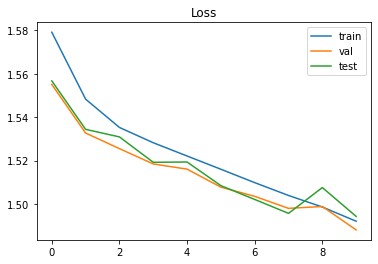

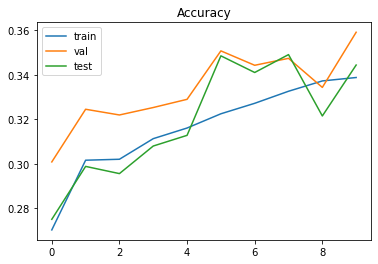

list of accuracy {'train': [0.27034977064220184, 0.30166284403669724, 0.3020928899082569, 0.31134747706422017, 0.31612672018348625, 0.32252006880733947, 0.3272276376146789, 0.3326433486238532, 0.33727924311926605, 0.3388159403669725], 'val': [0.3008928571428572, 0.32455357142857144, 0.32198660714285715, 0.32533482142857145, 0.32901785714285714, 0.35078125, 0.3443080357142857, 0.34743303571428574, 0.33437500000000003, 0.35915178571428574], 'test': [0.27511160714285715, 0.2988839285714286, 0.2956473214285714, 0.3080357142857143, 0.31283482142857144, 0.34854910714285714, 0.3410714285714286, 0.3491071428571429, 0.3215401785714286, 0.3444196428571429]}
list of predictions tensor([[ 0.3574,  0.4046,  0.3738, -0.3018, -0.8941],
        [ 0.0173,  0.1555,  0.0753, -0.0818, -0.3836],
        [ 0.0031,  0.1319,  0.3468, -0.2907, -0.4274],
        [ 0.0990,  0.0839, -0.3998,  0.1443, -0.0940],
        [ 0.1133,  0.2293,  0.2671, -0.4136, -0.3670],
        [-0.1145, -0.1949, -0.6373,  0.0360,  0.7

In [121]:
# Train model
train(mymodel_4, loaders, optimizer, criterion, epochs=10, dev=dev)

In [122]:
print(mymodel_4)

CNN_4(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveMaxPool2d(output_size=2)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=256, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=5, bias=True)
  )
)


In [123]:
from torchsummary import summary

# summary(your_model, input_size=(channels, H, W))
summary(mymodel_4, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]           1,792
              ReLU-2           [-1, 64, 26, 26]               0
 AdaptiveMaxPool2d-3             [-1, 64, 2, 2]               0
           Flatten-4                  [-1, 256]               0
            Linear-5                 [-1, 1024]         263,168
              ReLU-6                 [-1, 1024]               0
            Linear-7                    [-1, 5]           5,125
Total params: 270,085
Trainable params: 270,085
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.68
Params size (MB): 1.03
Estimated Total Size (MB): 1.72
----------------------------------------------------------------


In [124]:
for name, param in mymodel_4.named_parameters():
    print(name, param.shape)

conv_layer.0.weight torch.Size([64, 3, 3, 3])
conv_layer.0.bias torch.Size([64])
fc_layers.1.weight torch.Size([1024, 256])
fc_layers.1.bias torch.Size([1024])
fc_layers.3.weight torch.Size([5, 1024])
fc_layers.3.bias torch.Size([5])


In [125]:
# define a function for counting the parameters of a model
def count_parameters(mymodel_4):
    return sum(p.numel() for p in mymodel_4.parameters() )

In [126]:
count_parameters(mymodel_4)

270085